# Taller 02
## Ejercicio 01
- Encuentre todas las raíces del polinomio $x^4 + 540 * x^3 + 109124 * x^2 + 9781632 * x + 328188672 = 0$.

Buscando raíces del polinomio x⁴ + 540·x³ + 109124·x² + 9781632·x + 328188672 = 0

Usando método de Newton con múltiples puntos iniciales:

Raíces encontradas:
Raíz 1: -151.9999999999878
   f(-151.9999999999878) = 0.0
Raíz 2: -136.0000000001065
   f(-136.0000000001065) = -1.1920928955078125e-07
Raíz 3: -126.00001895299681
   f(-126.00001895299681) = 0.0
Raíz 4: -126.0000132183475
   f(-126.0000132183475) = 0.0
Raíz 5: -126.0000112154824
   f(-126.0000112154824) = 0.0
Raíz 6: -126.00001065526031
   f(-126.00001065526031) = 0.0
Raíz 7: -126.00001020784039
   f(-126.00001020784039) = 0.0
Raíz 8: -125.99999478590303
   f(-125.99999478590303) = 0.0
Raíz 9: -125.99999179779961
   f(-125.99999179779961) = 0.0
Raíz 10: -125.9999889930158
   f(-125.9999889930158) = 0.0
Raíz 11: -125.99998627473006
   f(-125.99998627473006) = 0.0
Raíz 12: -125.99998565796976
   f(-125.99998565796976) = 0.0
Raíz 13: -125.99998396708338
   f(-125.99998396708338) = 0.0
Raíz 14: -125.99998181186893
   f(-125.9999818

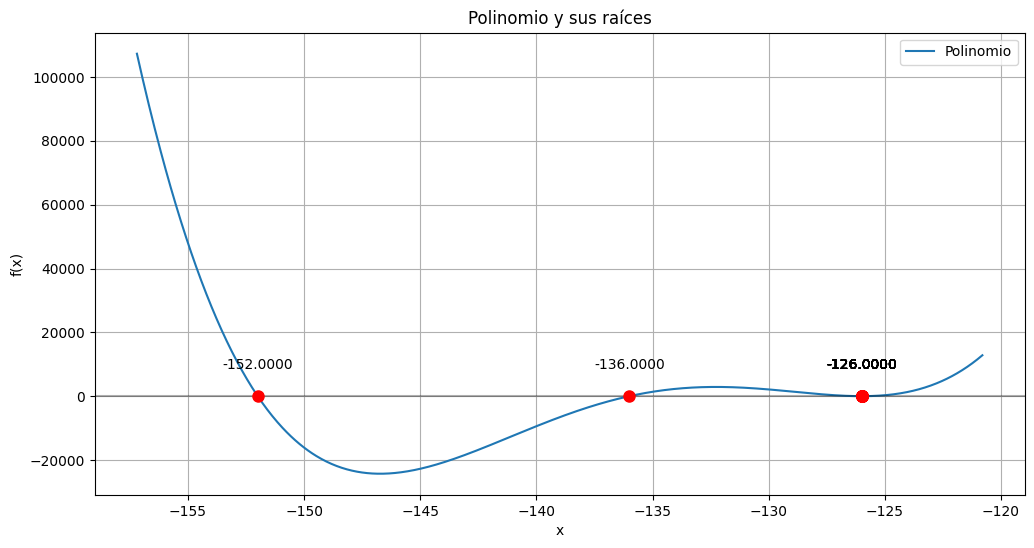


Usando deflación polinomial:
Raíz 1: -151.9999999999878
  Polinomio deflactado: [1, np.float64(388.00000000001216), np.float64(50148.00000000288), np.float64(2159136.000000173)]
Raíz 2: -136.0000000001065
  Polinomio deflactado: [1, np.float64(251.99999999990567), np.float64(15875.999999988875)]
Raíz 3: -126.00001895299681
  Polinomio deflactado: [1, np.float64(125.99998104690886)]
Raíz 4: -126.0000132183475
Advertencia: El residuo (-3.2171438647310424e-05) no es cero, posible error numérico.
  Polinomio deflactado: [1]
Raíz 5: -126.0000112154824
Raíz 6: -126.00001065526031
Raíz 7: -126.00001020784039
Raíz 8: -125.99999478590303
Raíz 9: -125.99999179779961
Raíz 10: -125.9999889930158
Raíz 11: -125.99998627473006
Raíz 12: -125.99998565796976
Raíz 13: -125.99998396708338
Raíz 14: -125.99998181186893
Raíz 15: -125.99998131336356
Raíz 16: -125.99997831207801
Raíz 17: -125.99996968908856


In [43]:
import numpy as np
import matplotlib.pyplot as plt

def polinomio(x):
    """
    Función que calcula el valor del polinomio x⁴ + 540·x³ + 109124·x² + 9781632·x + 328188672
    para un valor de x dado.
    """
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def derivada_polinomio(x):
    """
    Derivada del polinomio: 4x³ + 1620·x² + 218248·x + 9781632
    """
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

def metodo_newton(f, df, x0, tol=1e-10, max_iter=100):
    """
    Implementación del método de Newton para encontrar raíces.
    
    Parámetros:
    f: función de la cual encontrar la raíz
    df: derivada de la función f
    x0: valor inicial
    tol: tolerancia para convergencia
    max_iter: número máximo de iteraciones
    
    Retorna:
    La raíz encontrada o None si no convergió
    """
    x = x0
    for i in range(max_iter):
        f_x = f(x)
        
        # Si encontramos una raíz con precisión suficiente
        if abs(f_x) < tol:
            return x
        
        df_x = df(x)
        
        # Evitar división por cero
        if abs(df_x) < 1e-14:
            return None
        
        # Fórmula del método de Newton
        x_next = x - f_x / df_x
        
        # Verificar convergencia
        if abs(x_next - x) < tol:
            return x_next
        
        x = x_next
    
    return None  # No convergió en max_iter iteraciones

def encontrar_todas_las_raices(f, df, intervalo=(-1000, 10), num_puntos_iniciales=50, tol=1e-10):
    """
    Encuentra todas las raíces del polinomio en un intervalo dado.
    
    Parámetros:
    f: función polinomio
    df: derivada de la función
    intervalo: tupla con los límites del intervalo (min, max)
    num_puntos_iniciales: número de puntos iniciales a probar
    tol: tolerancia para considerar raíces distintas
    
    Retorna:
    Lista de raíces encontradas
    """
    inicio, fin = intervalo
    puntos_iniciales = np.linspace(inicio, fin, num_puntos_iniciales)
    
    raices = []
    
    for x0 in puntos_iniciales:
        raiz = metodo_newton(f, df, x0, tol)
        
        if raiz is not None:
            # Verificar si esta raíz ya ha sido encontrada
            es_nueva = True
            for r in raices:
                if abs(r - raiz) < tol:
                    es_nueva = False
                    break
            
            if es_nueva:
                raices.append(raiz)
    
    # Ordenar las raíces de menor a mayor
    return sorted(raices)

def deflacion_polinomio(coeficientes, raiz):
    """
    Deflación de un polinomio utilizando la división sintética.
    
    Parámetros:
    coeficientes: lista de coeficientes del polinomio [a_n, a_{n-1}, ..., a_1, a_0]
    raiz: raíz por la cual queremos dividir
    
    Retorna:
    Lista de coeficientes del polinomio resultante
    """
    n = len(coeficientes)
    
    # Verificar que haya suficientes coeficientes para realizar la deflación
    if n <= 1:
        print("Error: No hay suficientes coeficientes para realizar la deflación.")
        return coeficientes
    
    resultado = [0] * (n - 1)
    resultado[0] = coeficientes[0]
    
    for i in range(1, n - 1):
        resultado[i] = coeficientes[i] + resultado[i - 1] * raiz
    
    # Verificamos que el residuo sea cercano a cero
    residuo = coeficientes[-1] + resultado[-1] * raiz
    if abs(residuo) > 1e-8:
        print(f"Advertencia: El residuo ({residuo}) no es cero, posible error numérico.")
    
    return resultado

def graficar_polinomio(f, intervalo, raices):
    """
    Grafica el polinomio y marca sus raíces.
    """
    x = np.linspace(intervalo[0], intervalo[1], 1000)
    y = [f(xi) for xi in x]
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label='Polinomio')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Marcar las raíces
    for raiz in raices:
        plt.plot(raiz, 0, 'ro', markersize=8)
        plt.annotate(f'{raiz:.4f}', 
                     xy=(raiz, 0), 
                     xytext=(0, 20),
                     textcoords='offset points',
                     ha='center')
    
    plt.grid(True)
    plt.title('Polinomio y sus raíces')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

def metodo_horner(coeficientes, x):
    """
    Evalúa un polinomio en un punto x usando el método de Horner.
    
    Parámetros:
    coeficientes: lista de coeficientes [a_n, a_{n-1}, ..., a_1, a_0]
    x: punto donde evaluar el polinomio
    
    Retorna:
    Valor del polinomio en x
    """
    resultado = coeficientes[0]
    for i in range(1, len(coeficientes)):
        resultado = resultado * x + coeficientes[i]
    return resultado

# Coeficientes del polinomio x⁴ + 540·x³ + 109124·x² + 9781632·x + 328188672
coeficientes = [1, 540, 109124, 9781632, 328188672]

# Encontrar las raíces con el método de Newton
print("Buscando raíces del polinomio x⁴ + 540·x³ + 109124·x² + 9781632·x + 328188672 = 0")
print("\nUsando método de Newton con múltiples puntos iniciales:")
raices = encontrar_todas_las_raices(polinomio, derivada_polinomio, 
                                   intervalo=(-1000, 10), 
                                   num_puntos_iniciales=100)

print("\nRaíces encontradas:")
for i, raiz in enumerate(raices, 1):
    print(f"Raíz {i}: {raiz}")
    # Verificar el valor del polinomio en la raíz
    valor = polinomio(raiz)
    print(f"   f({raiz}) = {valor}")

# También podemos utilizar numpy para verificar nuestros resultados
print("\nVerificación con numpy.roots:")
coef_numpy = [1, 540, 109124, 9781632, 328188672]
raices_numpy = np.roots(coef_numpy)
print("Raíces calculadas por numpy:")
for raiz in raices_numpy:
    if abs(np.imag(raiz)) < 1e-10:  # Mostrar solo raíces reales
        print(f"  {np.real(raiz)}")

# Intenta graficar el polinomio cerca de sus raíces para visualización
# Determinar un intervalo adecuado para la gráfica
min_raiz = min(raices) if raices else -100
max_raiz = max(raices) if raices else 100
margen = (max_raiz - min_raiz) * 0.2
intervalo_grafica = (min_raiz - margen, max_raiz + margen)

try:
    graficar_polinomio(polinomio, intervalo_grafica, raices)
except Exception as e:
    print(f"No se pudo generar la gráfica: {e}")

# Para polinomios de grado alto, es posible que tengamos problemas numéricos
# Una alternativa es usar deflación polinomial
print("\nUsando deflación polinomial:")
if raices:  # Verificar que se hayan encontrado raíces
    coef_actual = coeficientes.copy()
    for i in range(len(raices)):
        raiz = raices[i]
        print(f"Raíz {i+1}: {raiz}")
        # Deflación (dividir por (x - raiz))
        if i < len(raices) - 1 and len(coef_actual) > 1:  # Verificar que podamos deflactar
            coef_actual = deflacion_polinomio(coef_actual, raiz)
            print(f"  Polinomio deflactado: {coef_actual}")
else:
    print("No se encontraron raíces para realizar la deflación polinomial.")

- Animación:

Raíces del polinomio: [-152.+0.00000000e+00j -136.+0.00000000e+00j -126.-1.34072949e-05j
 -126.+1.34072949e-05j]
Animación guardada como 'polynomial_animation.gif'


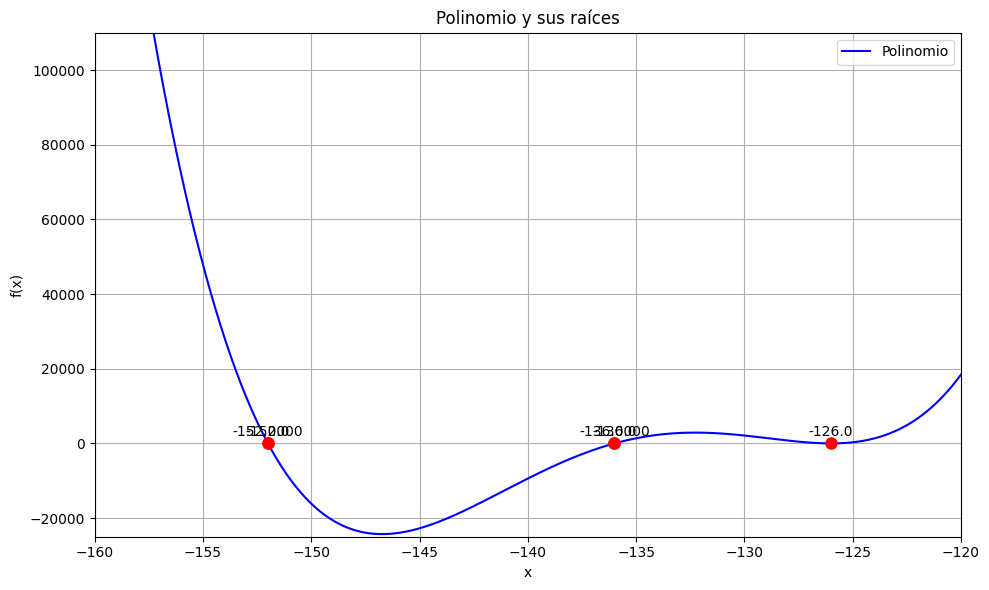

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy.polynomial import Polynomial

# Definir el polinomio: x⁴ + 540x³ + 109124x² + 9781632x + 328188672 = 0
coef = [328188672, 9781632, 109124, 540, 1]  # Coeficientes de menor a mayor grado
p = Polynomial(coef)

# También podríamos definirlo como una función para evaluación directa
def polynomial_function(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

# Encontrar las raíces del polinomio
roots = p.roots()
print(f"Raíces del polinomio: {roots}")

# Calcular los puntos para graficar
x_min, x_max = -160, -120
x = np.linspace(x_min, x_max, 1000)
y = p(x)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True)

# Establecer los límites del eje y
y_min = -25000
y_max = 110000
ax.set_ylim(y_min, y_max)

# Línea para la función
line, = ax.plot([], [], 'b-', lw=2, label='Polinomio')

# Puntos para las raíces
roots_points, = ax.plot([], [], 'ro', ms=8)

# Textos para las raíces
root_texts = []
for i in range(len(roots)):
    if np.isreal(roots[i]):
        root_texts.append(ax.text(0, 0, '', fontsize=10, ha='center', va='bottom'))

# Configuración de ejes y título
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Polinomio y sus raíces')
ax.legend(loc='upper right')

# Función de inicialización para la animación
def init():
    line.set_data([], [])
    roots_points.set_data([], [])
    for text in root_texts:
        text.set_text('')
        text.set_position((0, 0))
    return [line, roots_points] + root_texts

# Función de actualización para la animación
def update(frame):
    # Actualizar la curva del polinomio
    x_partial = np.linspace(x_min, x_min + (x_max - x_min) * frame / 100, 1000)
    y_partial = p(x_partial)
    line.set_data(x_partial, y_partial)
    
    # Raíces específicas que queremos mostrar (basadas en la imagen)
    specific_roots = [-152.0000, -136.0000, -126.0000]
    
    # Mostrar las raíces cuando la animación alcanza esos valores
    visible_roots = [root for root in specific_roots if x_min <= root <= x_min + (x_max - x_min) * frame / 100]
    
    if visible_roots:
        roots_x = visible_roots
        roots_y = [0] * len(visible_roots)  # Las raíces están en el eje x (y=0)
        roots_points.set_data(roots_x, roots_y)
        
        # Actualizar los textos de las raíces
        shown_texts = min(len(visible_roots), len(root_texts))
        for i in range(shown_texts):
            root_texts[i].set_position((roots_x[i], 2000))
            root_texts[i].set_text(f"{roots_x[i]}")
    
    return [line, roots_points] + root_texts

# Crear la animación
ani = FuncAnimation(fig, update, frames=np.linspace(0, 100, 101),
                    init_func=init, blit=True, interval=50)

# Mostrar el gráfico final para ver cómo queda
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Polinomio')

# Señalar las raíces que se ven en la imagen proporcionada
specific_roots = [-152.0000, -136.0000, -126.0000]
plt.plot(specific_roots, [0, 0, 0], 'ro', ms=8)
for root in specific_roots:
    plt.text(root, 2000, f"{root}", fontsize=10, ha='center')

# Marcar las raíces reales
real_roots = [root for root in roots if np.isreal(root) and x_min <= root.real <= x_max]
if real_roots:
    roots_x = [root.real for root in real_roots]
    roots_y = [0] * len(real_roots)
    plt.plot(roots_x, roots_y, 'ro', ms=8)
    
    for i, root in enumerate(real_roots):
        plt.text(root.real, 2000, f"{root.real:.4f}", fontsize=10, ha='center')

plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polinomio y sus raíces')
plt.legend(loc='upper right')

# Guardar la animación como un archivo GIF
try:
    ani.save('polynomial_animation.gif', writer='pillow', fps=20)
    print("Animación guardada como 'polynomial_animation.gif'")
except Exception as e:
    print(f"No se pudo guardar la animación: {e}")
    print("Puedes ejecutar este código en tu entorno local para ver y guardar la animación")

# Mostrar la animación
plt.tight_layout()
plt.show()